# 贝叶斯线性回归
## 创建一个数据集 $\mathcal{D}$
本节中我们需要对一个多项式进行拟合, 我们选择 $y = sin(2 \pi x) + \epsilon$, 其中 $\epsilon$ 是一个由 $\mu = 0, \sigma = 0.3$ 的高斯分布生成的噪音. 数据集由 $[0, 1]$ 上等距产生的 10 个点 $\boldsymbol{x} = \{x_1, \cdots, x_10\}$ 所计算出的 $\boldsymbol{y}$. 

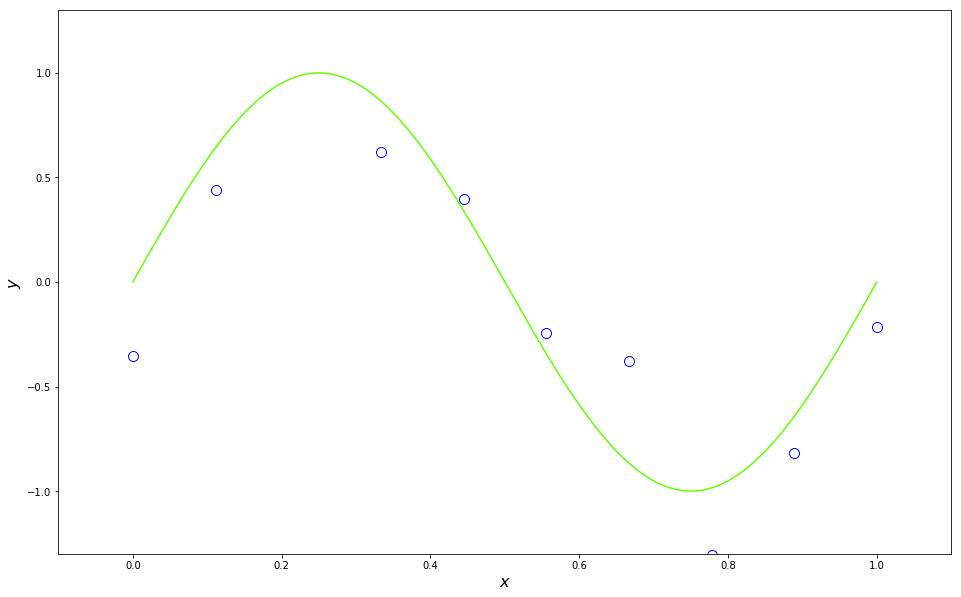

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# 构造目标曲线和训练数据集
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
x_tr = np.linspace(0, 1, 10)
y_tr = np.sin(2 * np.pi * x_tr) + np.random.normal(0, 0.3, 10)
# 画图
plt.figure(figsize=(16, 10))
plt.plot(x, y, color='#66FF00')
plt.plot(x_tr, y_tr, 'o', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.3, 1.3)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

## 线性模型
用多项式曲线来拟合目标函数:

$$\hat{y}(x, \boldsymbol{w}) = \sum_{j=0}^M w_j x^j$$

> `M` 为多项式的阶, 也就是模型的复杂度(容量)

该模型为线性模型, 误差函数(error function) 可以用测试集上的 **均方误差(mean squared error)**: $\text{MSE}_{\text{test}} = \frac{1}{m} \sum_i(\hat{\boldsymbol{y}}^{(\text{test}))} - \boldsymbol{y}^{(\text{test})})_i^2 = \frac{1}{m} \lVert \hat{\boldsymbol{y}}^{(\text{test})} - \boldsymbol{y}^{(\text{test})}\rVert_2^2$ (越小越好, 也就是平方欧几里德距离除以 $m$ ).

> MSE 就是作为线性回归的目标函数

模型的容量导致的过拟合和欠拟合(当 M = 0 和 1 的时候为欠拟合, 当 M = 9 的时候为过拟合):

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


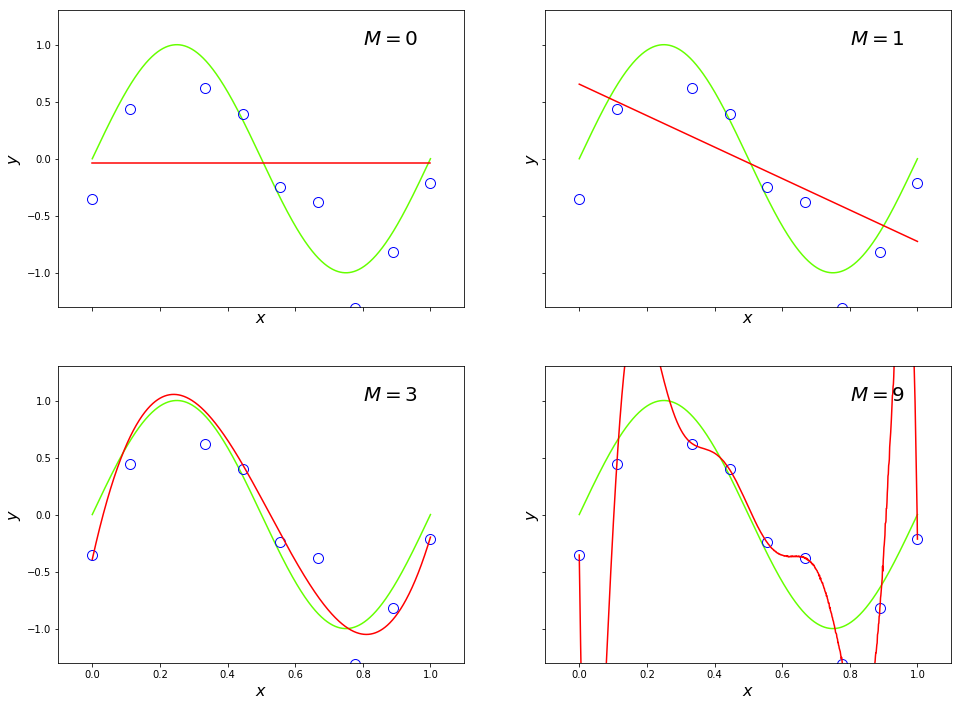

In [42]:
def predict(w, x):
    '''make predictions for x
    # Arguments:
        w: coefficients of the polynomial model
        x: vector of input variables
    # Returns:
        predicted target variables
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    return X.dot(w) # 点乘


# 模型的不同容量
M_vals = [0, 1, 3, 9]
# 2x2 的子图
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))
# axes 是形如 [[x_1, y_1], [x_2, y_2]] 的列表(x_1 表示图一的 x 轴), 需要扁平化为 [x_1, y_1, x_2, y_2] 的列表
axes = np.ravel(axes)
for M, ax in zip(M_vals, axes):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.plot(x, predict(w, x), 'r-')
    ax.text(0.8, 1, '$M={}$'.format(M), size=20)

用 `MSE` 来评估模型的泛化能力:

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


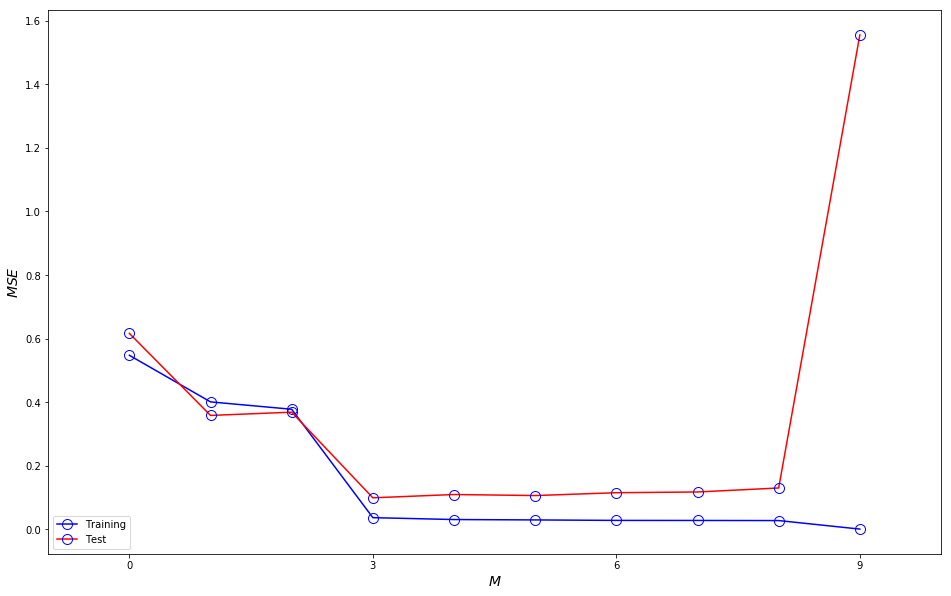

In [4]:
# 100 个 test 点
n_te = 100
x_te = np.linspace(0, 1, n_te)
y_te = np.sin(2 * np.pi * x_te) + np.random.normal(0, 0.3, n_te)
# train 和 test 的 MSE
mse_tr = []
mse_te = []
for M in range(10):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    mse_tr.append(np.sum((predict(w, x_tr) - y_tr) ** 2 / len(y_tr)))
    mse_te.append(np.sum((predict(w, x_te) - y_te) ** 2 / len(y_te)))
# 画图
plt.figure(figsize=(16, 10))
plt.plot(np.arange(10), mse_tr, 'bo-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Training')
plt.plot(np.arange(10), mse_te, 'ro-', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1, label='Test')
plt.xlim(-1, 10)
plt.xlabel('$M$', fontsize=14)
plt.ylabel('$\t{MSE}$', fontsize=14)
plt.legend(loc='lower left')
plt.xticks([0, 3, 6, 9])
plt.show()

## 正则化

为了减小模型的泛化误差, 除了增加数据集大小, 还可以通过在目标函数添加一个正则项 $\lambda \boldsymbol{w}^\top \boldsymbol{w}$ 来设定对模型容量的偏好($\lambda$ 越大表示偏好容量越小的模型), 这种技术被称为 **权重衰减**. 应用了上述正则项的回归被称为 **岭回归(ridge regression)**.
> 对于 `Least square`, 有很多种方法来达到这个目的, 并且在设计矩阵不是满秩的时候, 这些方法会有区别.
> Ref: [stackexchange](https://stats.stackexchange.com/questions/266631/what-is-the-difference-between-least-square-and-pseudo-inverse-techniques-for-li), [linear_least_squares.pdf](http://www.cameronmusco.com/personal_site/pdfs/linear_least_squares.pdf)

0.0
log(lambda)=-inf:
w_0=-0.41, w_1=6.73, w_2=64.17, w_3=-396.39, w_4=401.79, w_5=976.41, w_6=-1915.24, w_7=-65.07, w_8=1857.25, w_9=-929.46, 
1.522997974471263e-08
log(lambda)=-18:
w_0=-0.42, w_1=11.87, w_2=-4.27, w_3=-106.44, w_4=-3.58, w_5=785.05, w_6=-1091.18, w_7=-266.15, w_8=1266.18, w_9=-591.27, 
1.0
log(lambda)=0:
w_0=0.31, w_1=-0.27, w_2=-0.41, w_3=-0.32, w_4=-0.20, w_5=-0.09, w_6=0.00, w_7=0.07, w_8=0.13, w_9=0.17, 


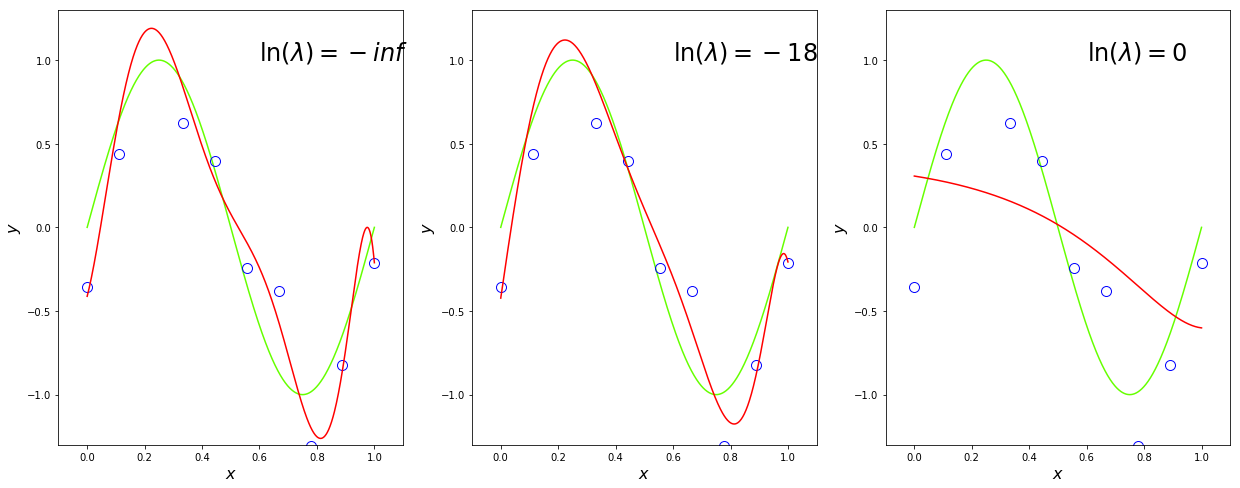

In [44]:
import functools # python3

# there are two(actually more) methods to **least square**(minimize the MSE), 
# Differences between methods can arise when the regressor matrix does not have full rank
def ridge_regression(x, y, lamb, M):
    '''ridge regression
    use derivative to calculate the result `w`
    Ref:
    https://blog.csdn.net/daunxx/article/details/51578787
    https://stats.stackexchange.com/questions/82880/
    applying-ridge-regression-for-an-underdetermined-system-of-equations
    # Arguments:
        x: vector of input variables
        y: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    print(lamb)
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    X_2 = X.T.dot(X)
    # np.linalg.inv is the inverse of square
    w = functools.reduce(np.dot, [np.linalg.inv(X_2 + np.dot(lamb, np.identity(X_2.shape[0]))), X.T, y])
    return w


def ridge_regression_psuedoinverse(x, t, lamb, M):
    '''ridge regression
    需要补一下线性代数的东西, 加了一个 $\lambda \boldsymbol{I}$ 之后对 SVD 的影响不知道怎么推导出来的.
    Ref:
    http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf
    https://github.com/alexhuth/ridge
    # Arguments:
        x: vector of input variables
        t: targets of input variables
        lamb: regularization parameter
        M: degree of polynomial model
    # Returns:
        coefficients of the polynomial model    
    '''
    Phi = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    U, S, Vh = np.linalg.svd(Phi, full_matrices=False)
    Ut = U.T.dot(t)
    return functools.reduce(np.dot, [Vh.T, np.diag(S/(S**2 + lamb)), Ut])

    
# 9-阶函数回归
M = 9
fig, axes = plt.subplots(1, 3, figsize=(21, 8))
axes = np.ravel(axes)
for log_lamb, ax in zip([-np.inf, -18, 0], axes):
    w_ridge = ridge_regression(x_tr, y_tr, np.exp(log_lamb), M)
    # 画图
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)    
    ax.plot(x, predict(w_ridge, x), 'r')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.text(0.6, 1, '$\ln(\lambda)={}$'.format(log_lamb), size=24)
    print('log(lambda)={}:'.format(log_lamb))
    wgt_info = ''
    for i, ww in enumerate(w_ridge):
         wgt_info += 'w_{}={:.2f}, '.format(i, ww)
    print(wgt_info)